#        Handwritten Digit Recognition using MNIST

#### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2 as cv
from tensorflow.python.keras import activations
from tensorflow.python.keras.activations import softmax
from tensorflow.python.keras.metrics import accuracy
from os import access

#### Fetching data

In [2]:
data = tf.keras.datasets.mnist

In [3]:
(X_train, y_train), (X_test, y_test) = data.load_data()
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [4]:
# Normalizing data
X_train = tf.keras.utils.normalize(X_train, axis=1)
X_test = tf.keras.utils.normalize(X_test, axis=1)


#### Pre processing data

In [5]:
model = tf.keras.models.Sequential()

In [6]:
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [7]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

#### Training model

In [8]:
model.fit(X_train, y_train, epochs = 3)

Epoch 1/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2681 - accuracy: 0.9212
Epoch 2/3
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1092 - accuracy: 0.9668
Epoch 3/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0752 - accuracy: 0.9764


In [9]:
loss, accuracy = model.evaluate(X_test, y_test)
print("loss=", loss)
print("accuracy=",accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.1033 - accuracy: 0.9679
loss= 0.10326448082923889
accuracy= 0.9678999781608582


In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118282 (462.04 KB)
Trainable params: 118282 (462.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


1/1 [==============================] - 0s 23ms/step

 The predicted output is  3 



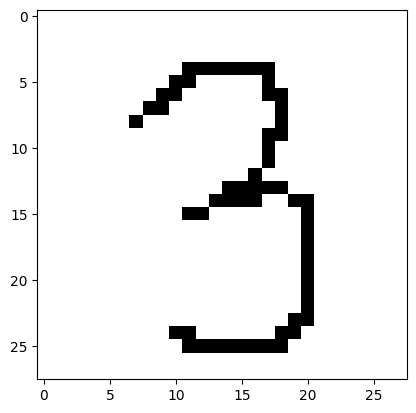

1/1 [==============================] - 0s 21ms/step

 The predicted output is  2 



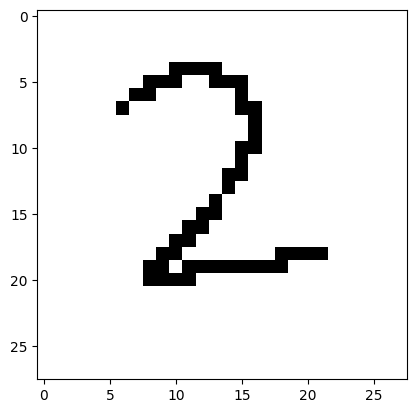

1/1 [==============================] - 0s 21ms/step

 The predicted output is  6 



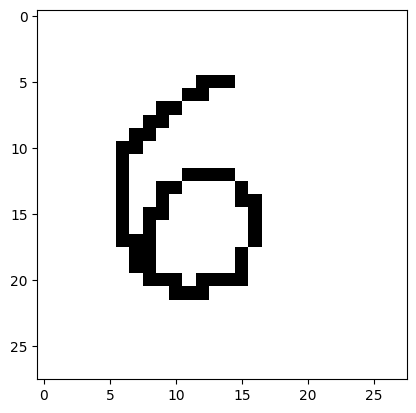

1/1 [==============================] - 0s 25ms/step

 The predicted output is  7 



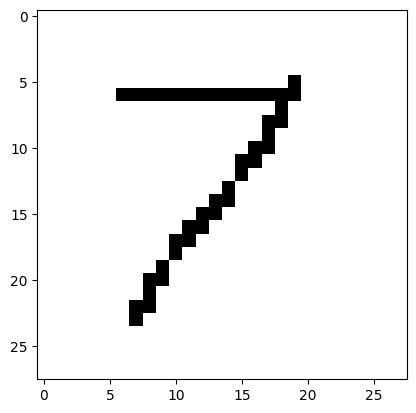

1/1 [==============================] - 0s 17ms/step

 The predicted output is  8 



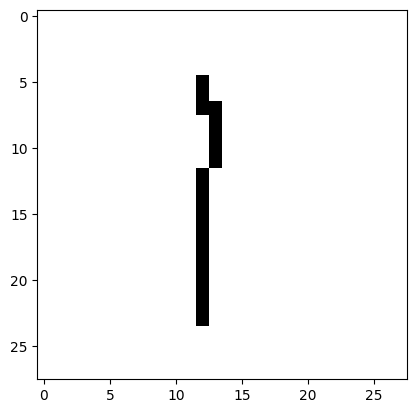

1/1 [==============================] - 0s 17ms/step

 The predicted output is  8 



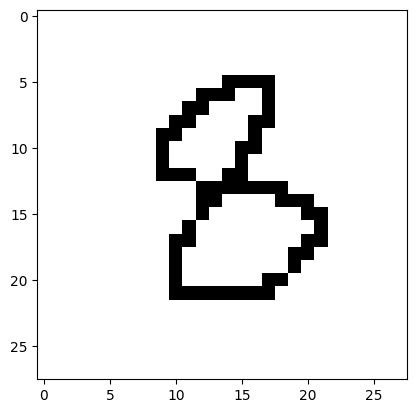

1/1 [==============================] - 0s 21ms/step

 The predicted output is  9 



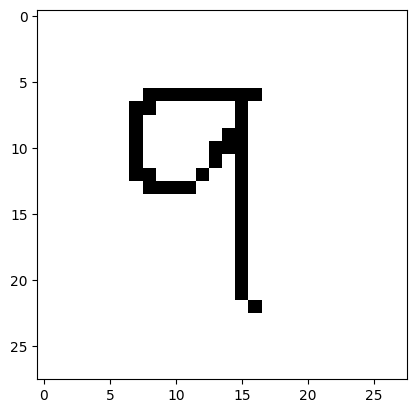

1/1 [==============================] - 0s 19ms/step

 The predicted output is  4 



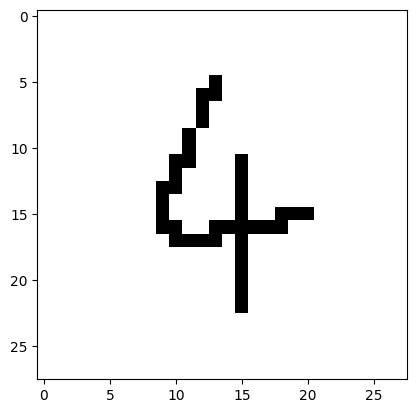

1/1 [==============================] - 0s 18ms/step

 The predicted output is  5 



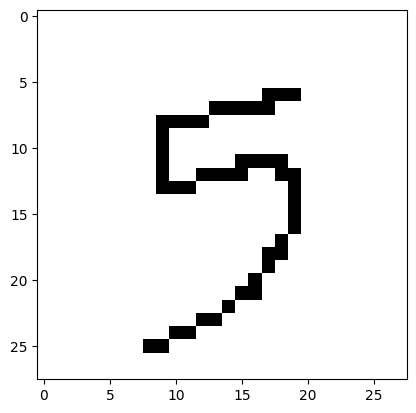

In [18]:
for i in range(1,10):
    img = cv.imread(f'{i}.png')[:, :, 0]
    img = np.invert(np.array([img]))
    prediction = model.predict(img)
    print('\n The predicted output is ', np.argmax(prediction),'\n')
    plt.imshow(img[0], cmap=plt.cm.binary)
    plt.show()